# Synthetic Exoring Light-curves

In [9]:
from geotrans import *
#from system import *
from data.kepler421 import *
%matplotlib notebook
%reload_ext autoreload
%autoreload 2

In [10]:
S=System
Snr=onlyPlanet(S)
Snr.Rplanet*=2.0

In [11]:
print("Ringed:",S.Ap,S.Ar)
print("Not ringed:",Snr.Ap,Snr.Ar)

Ringed: 0.03275369502168528 0.05534017669169519
Not ringed: 0.03275369502168528 0.05534017669169519


In [12]:
print("Contact times...")
tcsr=contactTimes(S)
tcen,t1,t2,t3,t4=tcsr
tmin=tcsr[1]-2*S.dtplanet
tmax=tcsr[4]+2*S.dtplanet
Ar=ringedPlanetArea(S)
Anr=ringedPlanetArea(Snr)
print("Times (s):",tmin,tcen,tmax)
print("Relative times (h):",(tmin-tcen)/HOUR,(tmax-tcen)/HOUR)

Contact times...
Times (s): -8882945.584005838 -8852289.680850314 -8822683.367676532
Relative times (h): -8.515528654312302 8.223975881606133


In [21]:
tcad=15.0*MINUTE #Cadence
nobs=int(ceil((tmax-tmin)/tcad)) #Number of observations
ntrans=5 #Number of transits
Nexp=tcad*S.Flux

print("Cadence time = %.2f min"%(tcad/MINUTE))
print("Counts per observation = %e"%(Nexp))
print("Number of observations per transit = %d"%(nobs))
print("Number of transits = %d"%(ntrans))

Cadence time = 15.00 min
Counts per observation = 5.983431e+07
Number of observations per transit = 66
Number of transits = 5


In [22]:
def signalFunction(t,arg):
    it=fluxLimbTime(t,Ar,S)
    s=S.Flux*it
    return s

In [23]:
ts=[]
ss=[]
dss=[]
for it in range(ntrans):
    t=tmin-randomVal(0,tcad)
    print(("*"*50))
    print(("Transit %d starting at t = %.2f h"%(it,(t-S.tcen)/HOUR)))
    for io in range(nobs):
        #INTEGRATE DURING CADENCE PERIOD
        Nobs=gaussianQuadrature(signalFunction,t,t+tcad)

        #RANDOM
        Nobs=random.poisson(Nobs)
        dNobs=Nobs**0.5

        #ERROR AND SIGNAL
        s=Nobs/Nexp
        ds=dNobs/Nexp

        #STORE RESULT
        ss+=[s]
        dss+=[ds]
        ts+=[(t+tcad/2-S.tcen)/HOUR]
        t+=tcad

**************************************************
Transit 0 starting at t = -8.68 h
**************************************************
Transit 1 starting at t = -8.68 h
**************************************************
Transit 2 starting at t = -8.56 h
**************************************************
Transit 3 starting at t = -8.53 h
**************************************************
Transit 4 starting at t = -8.53 h


In [24]:
savetxt("lightcurve.dat",transpose(vstack((array(ts)*HOUR,ss,dss))))

In [25]:
signal=loadtxt("lightcurve.dat")
ts=signal[:,0]
ss=signal[:,1]
dss=signal[:,2]

In [26]:
tes=[]
ses=[]
snrs=[]
dt=S.dtplanet/2
tmin=min(ts+tcen)
tmax=max(ts+tcen)
for t in linspace(tmin,tmax,100):
    #A=transitAreaTimeFast(t,tcsr,Ar,S)
    se=fluxLimbTime(t,Ar,S)
    snr=fluxLimbTime(t,Anr,Snr)
    tes+=[(t-S.tcen)/HOUR]
    ses+=[se]
    snrs+=[snr]

savetxt("transit.dat",transpose(vstack((array(tes)*HOUR,ses))))

<IPython.core.display.Javascript object>


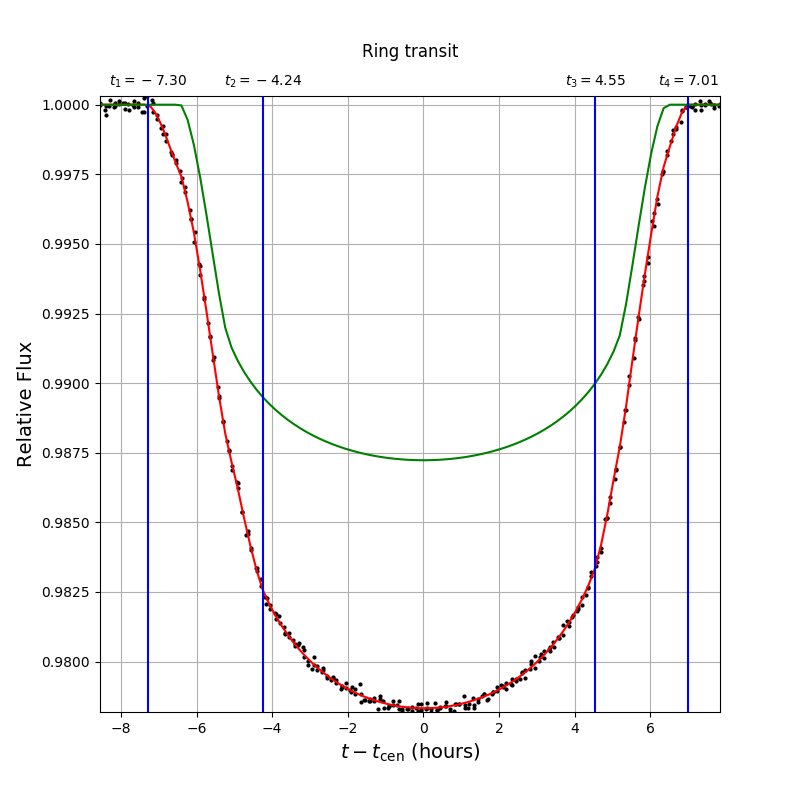

In [27]:
fig=plt.figure(figsize=(8,8))
ax=fig.gca()

#DATA POINTS
ax.plot(ts/HOUR,ss,'ko',markersize=2)
#ax.errorbar(ts/HOUR,ss,yerr=dss,linestyle='none',color='k')
ax.plot(tes,ses,'r-')
ax.plot(tes,snrs,'g-')

#FLUX RANGE
ymin=min(ss)
ymax=max(ss)
fy=1+0.01*(ymax-ymin)/ymax

#CONTACT TIMES
color='b'
ax.axvline((t1-tcen)/HOUR,color=color)
targs=dict(verticalalignment='bottom',fontsize=10,
           horizontalalignment='center',
           bbox=dict(fc='w',ec='none'))

ax.text((t1-tcen)/HOUR,fy*ymax,"Hola")
ax.text((t1-tcen)/HOUR,fy*ymax,'$t_1=%.2f$'%((t1-tcen)/HOUR),**targs)
ax.axvline((t2-tcen)/HOUR,color=color)
ax.text((t2-tcen)/HOUR,fy*ymax,'$t_2=%.2f$'%((t2-tcen)/HOUR),**targs)
ax.axvline((t3-tcen)/HOUR,color=color)
ax.text((t3-tcen)/HOUR,fy*ymax,'$t_3=%.2f$'%((t3-tcen)/HOUR),**targs)
ax.axvline((t4-tcen)/HOUR,color=color)
ax.text((t4-tcen)/HOUR,fy*ymax,'$t_4=%.2f$'%((t4-tcen)/HOUR),**targs)

#DECORATION
ax.set_ylim((ymin,ymax))
ax.set_xlim(((tmin-tcen)/HOUR,(tmax-tcen)/HOUR))
ax.set_xlabel(r"$t-t_{\rm cen}$ (hours)",fontsize=14)
ax.set_ylabel(r"Relative Flux",fontsize=14)
ax.set_title("Ring transit",position=(0.5,1.05))
ax.grid()

In [20]:
ss.min()

0.9780670257873421

## Unfolded light-curve

Fluxes will be calculated in PDCSAP_FLUX (see https://keplergo.arc.nasa.gov/PyKEprimerLCs.shtml)